In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
from matplotlib import cm  # LinearSegmentedColormap
from matplotlib.colors import colorConverter
import seaborn as sns
from scipy import stats
import warnings

sns.set_style("whitegrid")
plt.rcParams["figure.dpi"] = 100
%config InlineBackend.figure_format = "retina"
high_contrast_colors = ["#003f5c", "#ff6e54", "#f9f871", "#2db88b", "#955196"]
milder_colors = ["#00798c", "#d1495b", "#edae49", "#52a369", "#756ab2"]

%load_ext jupyter_black
warnings.filterwarnings("ignore")

In [2]:
stats.binom.rvs(n=1000, p=0.3, size=10)

array([295, 293, 295, 278, 293, 261, 271, 282, 297, 302])

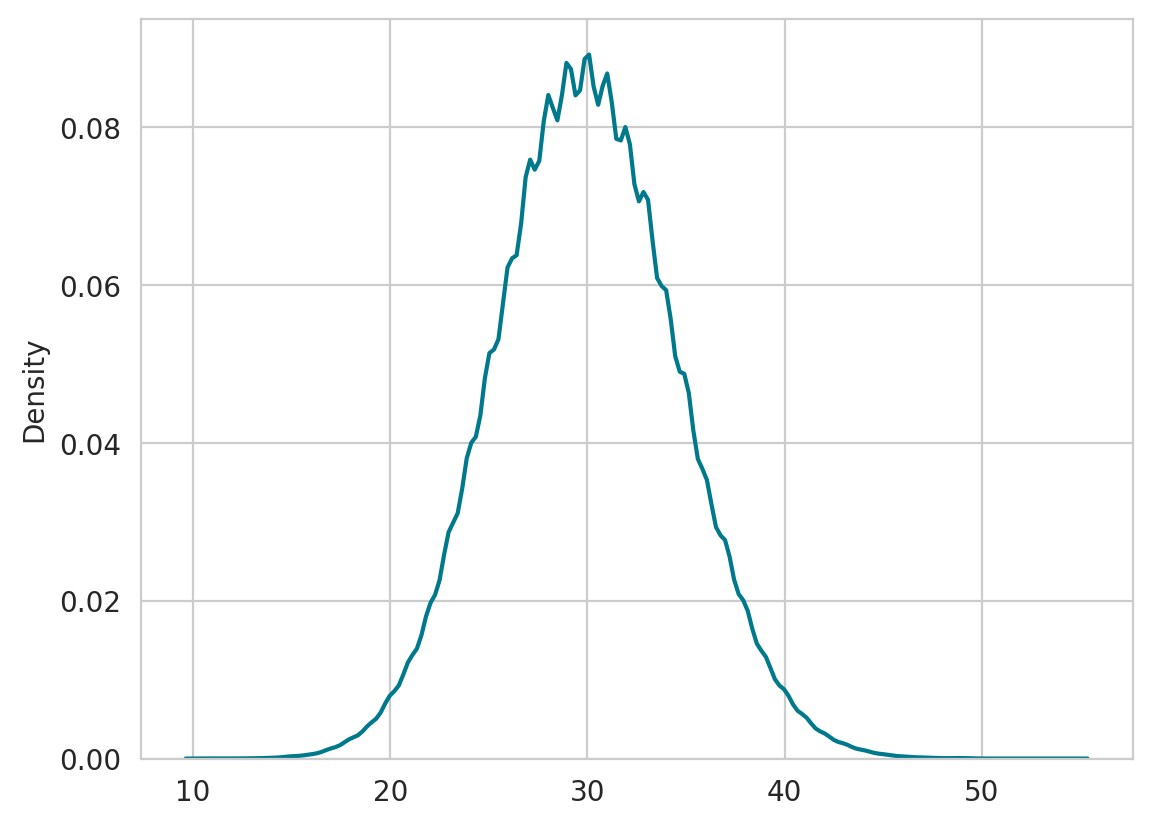

In [3]:
# plt.xkcd()
prior = stats.binom(n=100, p=0.3)
sns.kdeplot(data=prior.rvs(size=100_000), color="#00798c")
plt.show()

In [4]:
real_conversion_rate = 0.1

In [5]:
from scipy import stats

number_of_visitors = 100
website_visitors = stats.bernoulli.rvs(p=real_conversion_rate, size=number_of_visitors)
website_visitors

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [6]:
import numpy as np

# Count the unique values in the numpy array
unique, counts = np.unique(website_visitors, return_counts=True)

# Print the unique values and their counts
for u, c in zip(unique, counts):
    print(f"{u}: {c}")

0: 94
1: 6


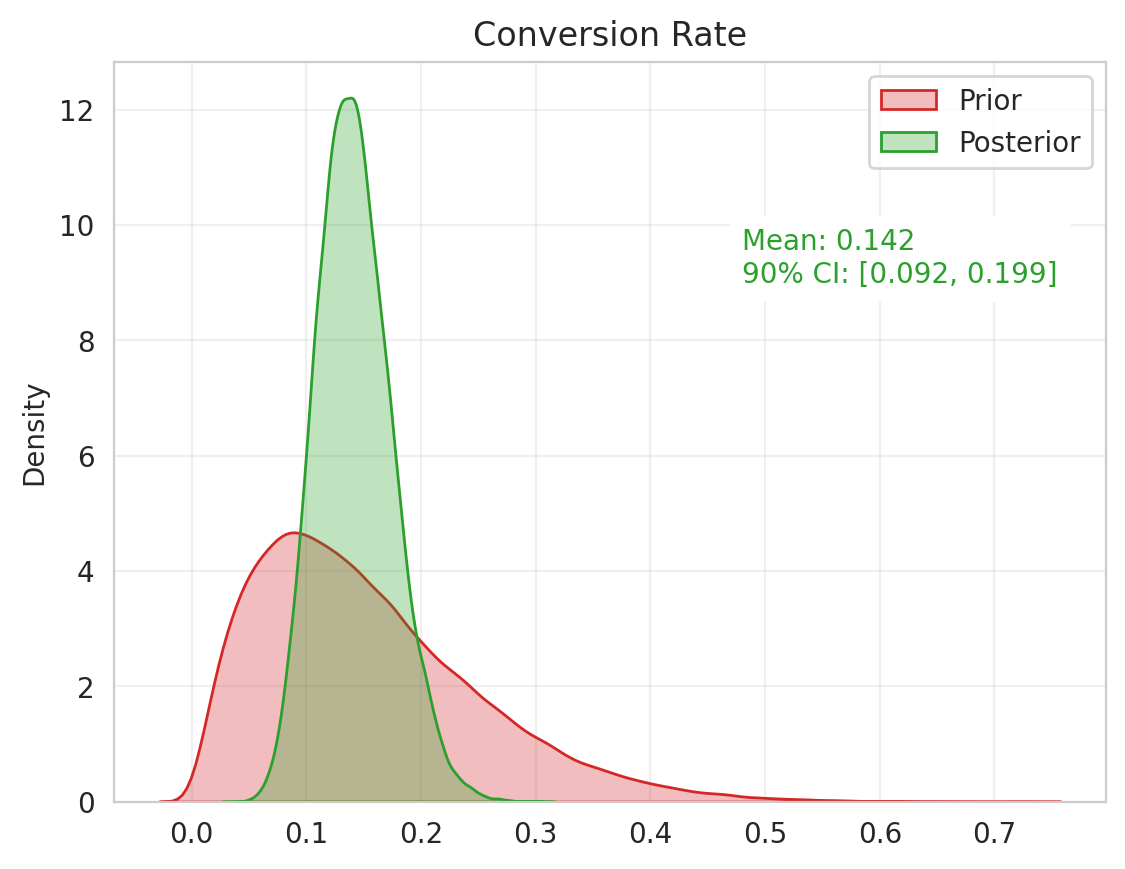

In [16]:
# plot a KDE plot with beta distribution a=1 and b=1
prior = stats.beta(a=2, b=11)
posterior = stats.beta(a=2 + 14, b=11 + 86)
sns.kdeplot(
    data=prior.rvs(size=100_000), color="tab:red", label="Prior", fill=True, alpha=0.3
)
sns.kdeplot(
    data=posterior.rvs(size=100_000),
    color="tab:green",
    label="Posterior",
    fill=True,
    alpha=0.3,
)
posterior_mean = np.round(posterior.mean(), 3)
posterior_q5, posterior_q95 = np.round(posterior.interval(0.9), 3)
plt.annotate(
    f"Mean: {posterior_mean}\n90% CI: [{posterior_q5}, {posterior_q95}]",
    xy=(0.2, 5),
    xytext=(0.48, 9),
    fontsize=10,
    color="tab:green",
    # weight="bold",
    backgroundcolor="white",
)
plt.title("Conversion Rate")
plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.show()

In [52]:
posterior_mean = np.round(posterior.mean(), 3)
posterior_q5, posterior_q95 = posterior.interval(0.9)
print(f"Posterior mean: {posterior_mean}")
print(f"Posterior 90% credible interval: ({posterior_q5:.3f}, {posterior_q95:.3f})")

Posterior mean: 0.142
Posterior 90% credible interval: (0.092, 0.199)


In [40]:
108 / 1000

0.108